In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter, OrderedDict

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\munna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
!pip install wordcloud

In [4]:
df = pd.read_csv('cvpr_2019_poster.csv')
df.shape

(1294, 12)

In [6]:
df.head(5)

,Paper ID,Paper Title,Author Names,Primary Subject Area,Secondary Subject Areas,Status,Day.Time,Poster #,Topic,Unnamed: 9,Topic Legend,Unnamed: 11
0,5,Finding Task-Relevant Features for Few-Shot Le...,Hongyang Li (The Chinese University of Hong Ko...,Deep Learning,NaN,Oral,1.1,1,A,NaN,A,Deep Learning
1,6340,Edge-Labeling Graph Neural Network for Few-sho...,Jongmin Kim (KAIST)*; Taesup Kim (Université d...,Deep Learning,"Recognition: Detection, Categorization, Retrie...",Oral,1.1,2,A,NaN,B,Recognition
2,5728,Generating Classification Weights with Graph N...,"Spyros Gidaris (valeo.ai)*; Nikos Komodakis (""...",Deep Learning,"Recognition: Detection, Categorization, Retrieval",Oral,1.1,3,A,NaN,C,"Seg, Grouping, Shape"
3,257,Kervolutional Neural Networks,Chen Wang (Nanyang Technological University)*;...,Deep Learning,Computer Vision Theory,Oral,1.1,4,A,NaN,D,"Stats, Physics, Theory, & Datasets"
4,4863,Why ReLu networks yield high-confidence predic...,Matthias Hein (University of Tuebingen)*; Maks...,Deep Learning,Statistical Learning,Oral,1.1,5,A,NaN,E,3D Multiview


In [7]:
df['Primary Subject Area'].value_counts()

Deep Learning                                        196
Recognition: Detection, Categorization, Retrieval    177
Face, Gesture, and Body Pose                          87
Low-level Vision                                      85
Image and Video Synthesis                             69
Vision + Language                                     66
3D from Multiview and Sensors                         61
Segmentation, Grouping and Shape                      61
Representation Learning                               56
3D from Single Image                                  46
Scene Analysis and Understanding                      45
Datasets and Evaluation                               35
Motion and Tracking                                   34
Vision Applications and Systems                       33
Action Recognition                                    33
Computational Photography                             33
Video Analytics                                       26
Medical, Biological and Cell Mi

### Main Subject Areas Discussed

In [8]:
d = df['Primary Subject Area'].value_counts().to_dict()
sorted_d = sorted(d.items(), key=lambda kv: kv[1], reverse = True)[:8]
sorted_d = OrderedDict(sorted_d)
print(sorted_d)

OrderedDict([('Deep Learning', 196), ('Recognition: Detection, Categorization, Retrieval', 177), ('Face, Gesture, and Body Pose', 87), ('Low-level Vision', 85), ('Image and Video Synthesis', 69), ('Vision + Language', 66), ('3D from Multiview and Sensors', 61), ('Segmentation, Grouping and Shape', 61)])


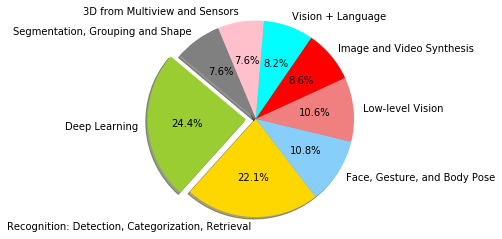

In [9]:
labels = [key for key, val in sorted_d.items()]
sizes = [val for key, val in sorted_d.items()]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'cyan', 'pink', 'gray']
explode = (0.1, 0, 0, 0, 0,0,0,0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### Main KeyWords

In [10]:
paper_title = []
paper_status = []
for i in range(len(df)):
    paper_title.append(df.loc[i, 'Paper Title'])
    paper_status.append(df.loc[i, 'Status'])

In [11]:
stopwords_deep_learning = ['learning', 'network', 'neural', 'networks', 'deep', 'via', 'using', 
                           'convolutional', 'single', 'image', 'object']

keyword_list = []
word_list_cleaned = [] 

for i in range(len(df)):   
    word_list = paper_title[i].split(" ")
    word_list = list(set(word_list))

    for word in word_list: 
        word = word.lower()
        if word not in stopwords.words('english') and word not in stopwords_deep_learning: #remove stopwords
            word_list_cleaned.append(word)

# print(word_list_cleaned)
keywords = Counter(word_list_cleaned)


In [12]:
for letter, count in keywords.most_common(10):
    print('%s: %7d' % (letter, count))

detection:     105
3d:      96
segmentation:      89
adversarial:      75
video:      74
recognition:      67
visual:      63
estimation:      61
semantic:      56
unsupervised:      53


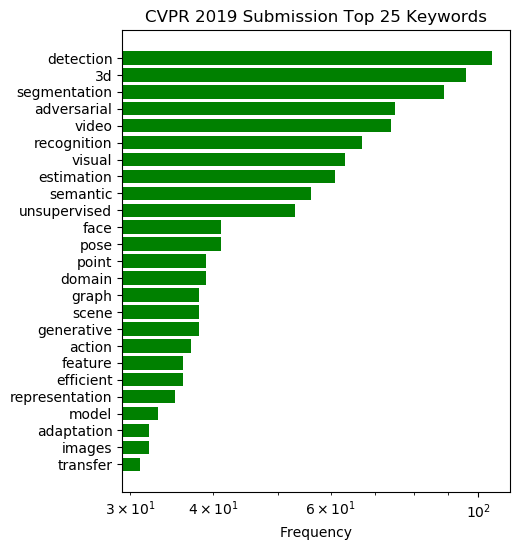

In [13]:
threshold = 25
keywords_mc = keywords.most_common(threshold)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(5, 6))

key = [k[0] for k in keywords_mc] 
value = [k[1] for k in keywords_mc] 
y_pos = np.arange(len(key))
ax.barh(y_pos, value, align='center', color='green', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis() 
ax.set_xlabel('Frequency')
ax.set_title('CVPR 2019 Submission Top {} Keywords'.format(threshold))

plt.show()

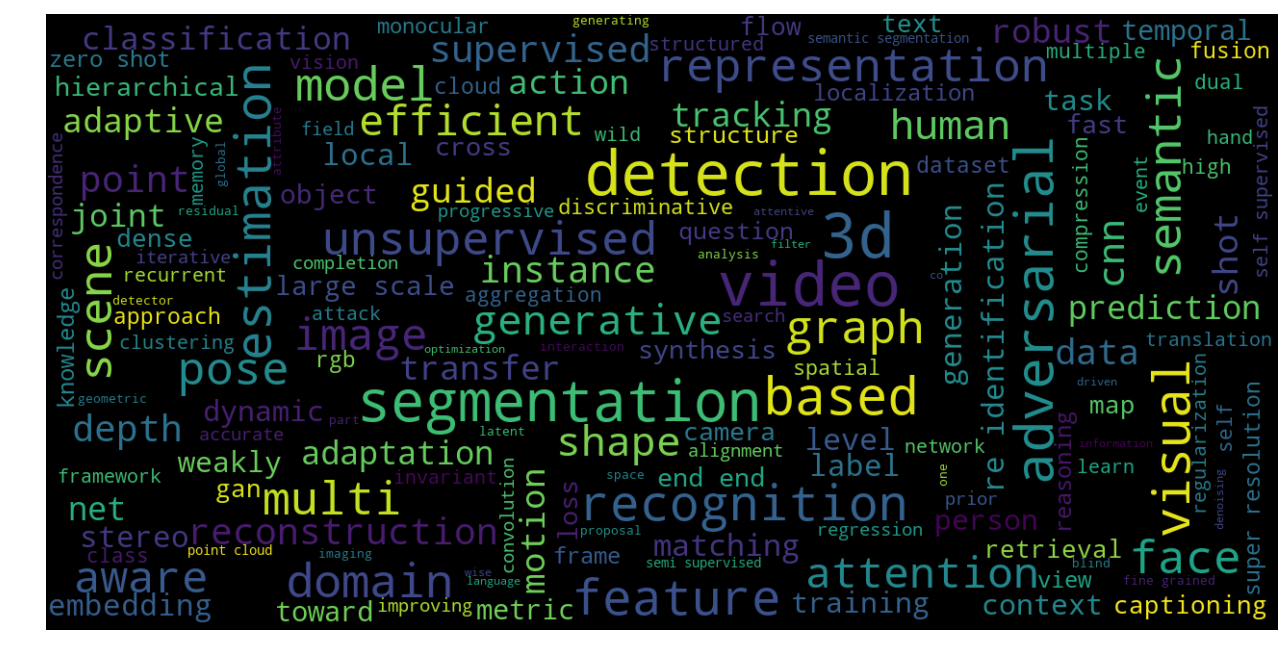

In [14]:
# Show the word cloud forming by keywords
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=64, max_words=160, 
                      width=1280, height=640,
                      background_color="black").generate(' '.join(word_list_cleaned))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Pull specific papers and prioritize those invited for oral talks

In [15]:
def pull_papers(topic, oral = True):
    for i in range(len(paper_title)):
        if topic in paper_title[i].lower():
            if oral:
                if paper_status[i].lower() == 'oral':
                    print(paper_title[i])
            else:
                print(paper_title[i])

In [16]:
pull_papers('detection')

STEP: Spatio-Temporal Progressive Learning for Video Action Detection
C-MIL: Continuation Multiple Instance Learning for Weakly Supervised Object Detection
PlaneRCNN: 3D Plane Detection and Reconstruction from a Single View
Reasoning-RCNN: Unifying Adaptive Global Reasoning into Large-scale Object Detection
Arbitrary Shape Scene Text Detection with Adaptive Text Region Representation
Adaptive NMS: Refining Pedestrian Detection in a Crowd
Sampling Techniques for Large-Scale Object Detection from Sparsely Annotated Objects
Deep Instance Co-segmentation by Co-peak Search and Co-saliency Detection
Shifting More Attention to Video Salient Object Detection
Twin-Cycle Autoencoder: Self-supervised Representation Learning from Entangled Movement for Facial Action Unit Detection


In [17]:
pull_papers('3d')

Deep Reinforcement Learning of Volume-guided Progressive View Inpainting for 3D Point Scene Completion from a Single Depth Image
DeepVoxels: Learning Persistent 3D Feature Embeddings
Supervised Fitting of Geometric Primitives to 3D Point Clouds
3D-SIS: 3D Semantic Instance Segmentation of RGB-D Scans
PlaneRCNN: 3D Plane Detection and Reconstruction from a Single View
Occupancy Networks: Learning 3D Reconstruction in Function Space
3D Shape Reconstruction from Images in the Frequency Domain
H+O: Unified Egocentric Recognition of 3D Hand-Object Poses and Interactions
GFrames: Gradient-Based Local Reference Frame for 3D Shape Matching
Photon-Flooded Single-Photon 3D Cameras
Joint Semantic-Instance Segmentation of 3D Point Clouds Using Multi-Set Label Conditional Random Fields
Shape2Motion: Joint Analysis of Motion Parts and Attributes from 3D Shapes
Know Before You Go: 3D Tracking and Forecasting with Rich Maps
Estimating 3D Motion and Forces of Person-Object Interactions from Monocular V

In [18]:
pull_papers('depth')

Deep Reinforcement Learning of Volume-guided Progressive View Inpainting for 3D Point Scene Completion from a Single Depth Image
Towards Scene Understanding: Unsupervised Monocular Depth Estimation with Semantic-aware Representation
Learning the Depths of Moving People by Watching Frozen People
Neural RGB -> D Sensing: Depth and Uncertainty from a Video Camera


In [19]:
pull_papers('segmentation')

Auto-DeepLab: Hierarchical Neural Architecture Search for Semantic Image Segmentation
MHP-VOS: Video Object Segmentation with Multiple Hypotheses Propagation
Learning Inter-pixel Relations for Weakly Supervised Instance Segmentation
ADVENT: Adversarial Entropy Minimization for Domain Adaptation in Semantic Segmentation
Structured Knowledge Distillation for Semantic Segmentation
Not All Areas Are Equal: Transfer Learning for Semantic Segmentation via Hierarchical Region Selection
3D-SIS: 3D Semantic Instance Segmentation of RGB-D Scans
UPSNet: A Unified Panoptic Segmentation Network
Joint Semantic-Instance Segmentation of 3D Point Clouds Using Multi-Set Label Conditional Random Fields
Proposal-free instance segmentation with a clustering loss function
Deep Instance Co-segmentation by Co-peak Search and Co-saliency Detection
Improving Semantic Segmentation via Video Propagation and Label Relaxation
Accel: A Corrective Fusion Network for Efficient Semantic Segmentation on Video
Semantic C

In [20]:
pull_papers('face')

Learning to Cluster Faces on an Affinity Graph
Deep Tree Learning for Zero-shot Face Anti-Spoofing
ArcFace: Additive Angular Margin Loss for Deep Face Recognition
APDrawingGAN: Generating Artistic Portrait Drawings from Face Photos with Hierarchical GANs
High-Quality Face Capture Using Anatomical Muscles
FML: Face Model Learning from Videos
AdaScale: Adaptively Scaling Cosine Logits for Effectively Learning Deep Face Representations
Combining 3D Morphable Models: A Largescale Face-and-Head Model
Boosting Local Shape Matching for Dense 3D Face Correspondence
Monocular Total Capture: Posing Face, Body, and Hands in the Wild
Expressive Body Capture: 3D Hands, Face, and Body from a Single Image


In [21]:
pull_papers('adversarial')

Adversarial Meta-Adaptation Network for Blending-target Domain Adaptation
Geometry-Consistent Generative Adversarial Networks for One-Sided Unsupervised Domain Mapping
Label-Noise Robust Generative Adversarial Networks
ADVENT: Adversarial Entropy Minimization for Domain Adaptation in Semantic Segmentation
Sphere Generative Adversarial Network Based on Geometric Moment Matching
Adversarial Attacks Beyond the Image Space
Evading Defenses to Transferable Adversarial Examples by Translation-Invariant Attacks
Decoupling Direction and Norm for Efficient Gradient-Based L2 Adversarial Attacks and Defenses
Balanced Self-Paced Learning for Generative Adversarial Clustering Network
A Style-Based Generator Architecture for Generative Adversarial Networks
Curls & Whey: Boosting Black-Box Adversarial Attacks
Barrage of Random Transforms for Adversarially Robust Defense
MeshAdv: Adversarial Meshes for Visual Recognition
Adversarial Inference for Multi-Sentence Video Description
Defense Against Advers

In [22]:
pull_papers('unsupervised')

Unsupervised Person Re-identification by Soft Multilabel Learning
Transferrable Prototypical Networks for Unsupervised Domain Adaptation
Unsupervised Person Image Generation with Semantic Parsing Transformation
Geometry-Consistent Generative Adversarial Networks for One-Sided Unsupervised Domain Mapping
AET vs. AED: Unsupervised Representation Learning by Auto-Encoding Transformations rather than Data
Towards Scene Understanding: Unsupervised Monocular Depth Estimation with Semantic-aware Representation
Unsupervised Learning of Dense Shape Correspondence
FineGAN: Unsupervised Hierarchical Disentanglement for Fine-Grained Object Generation and Discovery
DeepMapping: Unsupervised Map Estimation From Multiple Point Clouds
Unsupervised Visual Domain Adaptation: A Deep Max-Margin Gaussian Process Approach
Unsupervised Part-Based Disentangling of Object Shape and Appearance
“Double-DIP”: Unsupervised Image Decomposition via Coupled Deep-Image-Priors
